In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import (MultipleLocator, 
                               FormatStrFormatter, 
                               FuncFormatter,
                               AutoMinorLocator)
import numpy as np

#### Load data

In [54]:
data = pd.read_csv("population_sizes.csv")

In [55]:
data.head()

,report_month,churn,gain,total,registrations
0,2009-01-01,0.0,24.0,0.0,11946
1,2009-02-01,2.0,14.0,24.0,12049
2,2009-03-01,3.0,4.0,36.0,11697
3,2009-04-01,3.0,4.0,37.0,9582
4,2009-05-01,2.0,3.0,38.0,10052


In [56]:
len(data)

156

#### 1) Churn rate, conversion rate, regisztracio novekedesi utem, ami eszembe jut

Mivel nincs lemorzsolódó 2009 január elöttről azt feltételezem, hogy ekkor indul az egész biznisz úgy, ahogy van, vagyis az összes regisztrált száma egy kummulált összeg lesz.

In [57]:
data = data.assign(
    user_count = lambda x:x.registrations.cumsum(),
    reg_rate_per_user = lambda x: x.registrations / x.user_count,
    churn_rate_per_reg = lambda x: x.churn / x.registrations,
    churn_rate_per_user = lambda x: x.churn / x.user_count,
    conv_rate_per_reg = lambda x: x.gain / x.registrations,
    conv_rate_per_user = lambda x:x.gain / x.user_count,
    reg_delta = lambda x: x.registrations / x.registrations.shift(1),
    churn_delta = lambda x: x.churn / x.churn.shift(1),
    gain_delta = lambda x: x.gain / x.gain.shift(1),
    date = lambda x: pd.to_datetime(x.report_month),
    year = lambda x: x.date.dt.year,
    month = lambda x: x.date.dt.month,
    net_gain = lambda x: x.gain - x.churn,
    churn_rate_per_user_1 = lambda x: x.churn_rate_per_user + 0.000001 
)

In [58]:
data.head()

,report_month,churn,gain,total,registrations,user_count,reg_rate_per_user,churn_rate_per_reg,churn_rate_per_user,conv_rate_per_reg,conv_rate_per_user,reg_delta,churn_delta,gain_delta,date,year,month,net_gain,churn_rate_per_user_1
0,2009-01-01,0.0,24.0,0.0,11946,11946,1.000000,0.000000,0.000000,0.002009,0.002009,NaN,NaN,NaN,2009-01-01,2009,1,24.0,0.000001
1,2009-02-01,2.0,14.0,24.0,12049,23995,0.502146,0.000166,0.000083,0.001162,0.000583,1.008622,inf,0.583333,2009-02-01,2009,2,12.0,0.000084
2,2009-03-01,3.0,4.0,36.0,11697,35692,0.327720,0.000256,0.000084,0.000342,0.000112,0.970786,1.500000,0.285714,2009-03-01,2009,3,1.0,0.000085
3,2009-04-01,3.0,4.0,37.0,9582,45274,0.211645,0.000313,0.000066,0.000417,0.000088,0.819184,1.000000,1.000000,2009-04-01,2009,4,1.0,0.000067
4,2009-05-01,2.0,3.0,38.0,10052,55326,0.181687,0.000199,0.000036,0.000298,0.000054,1.049050,0.666667,0.750000,2009-05-01,2009,5,1.0,0.000037


In [59]:
data.dtypes

report_month                     object
churn                           float64
gain                            float64
total                           float64
registrations                     int64
user_count                        int64
reg_rate_per_user               float64
churn_rate_per_reg              float64
churn_rate_per_user             float64
conv_rate_per_reg               float64
conv_rate_per_user              float64
reg_delta                       float64
churn_delta                     float64
gain_delta                      float64
date                     datetime64[ns]
year                              int32
month                             int32
net_gain                        float64
churn_rate_per_user_1           float64
dtype: object

#### 2) Populáció dinamikája

A populáció alatt az előfizetőket és a regisztrálókat is érthetjük. Lesz egy, ezek abszolút értékét ábrázoló ábra és egy, ami az új előfizetők, regisztrálók, lemorzsolódók változásának az ütemét ábrázolja majd


##### a) Plot - Élő regisztrált és előfizető fiókok száma log skálán

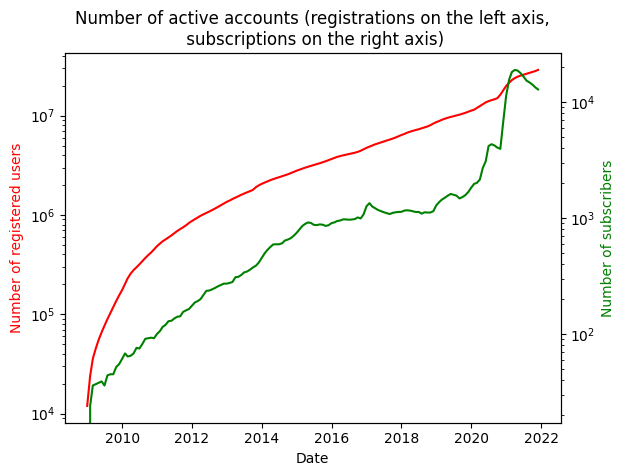

In [60]:
fig, ax1 = plt.subplots()
ax1.plot(data["date"],data["user_count"],color = "red")
ax1.set_xlabel("Date")
ax1.set_ylabel("Number of registered users",color = "red")
ax1.yaxis.set_major_formatter(FormatStrFormatter('%1.0f'))
ax1.set_title("Number of active accounts (registrations on the left axis,\n subscriptions on the right axis)")
ax1.set_yscale('log')
ax2 = ax1.twinx()
ax2.plot(data["date"],data["total"], color = "green")
ax2.set_ylabel("Number of subscribers",color = "green")
ax2.set_yscale('log')
plt.show()

##### b) Plot - Havi új regisztrációk száma illetve aránya a összes regisztrált számához képest

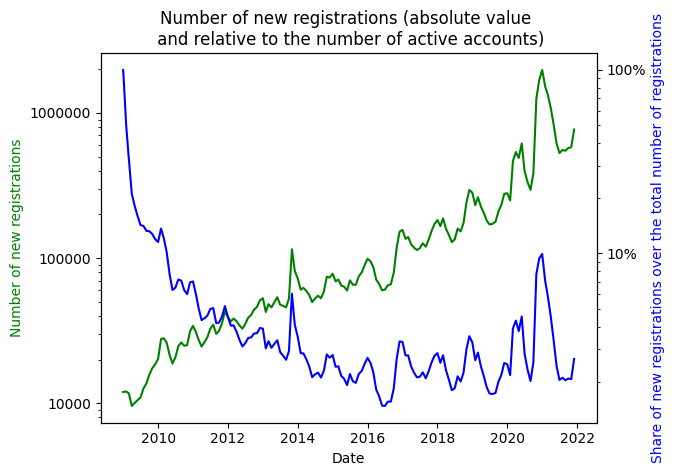

In [140]:
fig, ax1 = plt.subplots()
ax1.plot(data["date"],data["registrations"],color = "green")
ax1.set_xlabel("Date")
ax1.set_ylabel("Number of new registrations",color = "green")
ax1.set_title("Number of new registrations (absolute value \n and relative to the number of active accounts)")
ax1.set_yscale('log')
ax1.yaxis.set_major_formatter(FormatStrFormatter('%1.0f'))
ax2 = ax1.twinx()
ax2.plot(data["date"],data["reg_rate_per_user"], color = "blue")
ax2.set_ylabel("Share of new registrations over the total number of registrations",color = "blue")
ax2.set_yscale('log')
ax2.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
plt.show()

##### c) Plot - Conversion rate and churn rate on a log scale

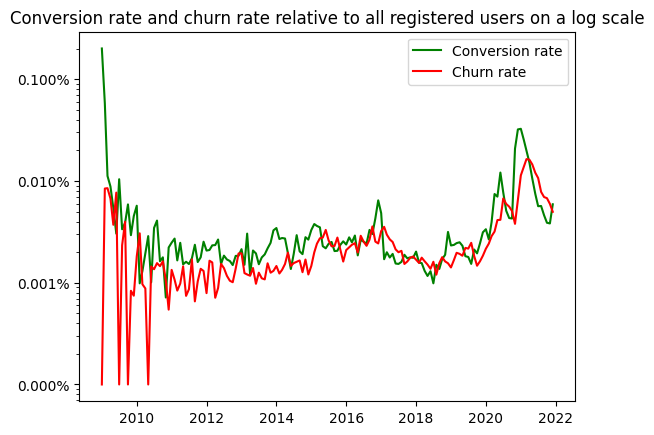

In [62]:
fig, ax1 = plt.subplots()
ax1.plot(data["date"],data["conv_rate_per_user"],color = "green",label = "Conversion rate")
ax1.plot(data["date"],data["churn_rate_per_user_1"], color = "red",label = "Churn rate")
ax1.set_yscale('log')
#ax1.yaxis.set_major_formatter(FormatStrFormatter('%1.6f'))
ax1.set_title("Conversion rate and churn rate relative to all registered users on a log scale")
ax1.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.3%}'.format(y)))
plt.legend()
# Displaying the plot
plt.show()

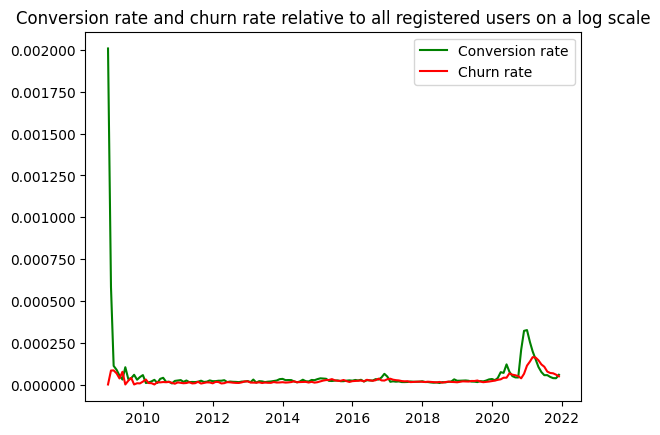

In [67]:
# On a non-log scale:
fig, ax1 = plt.subplots()
ax1.plot(data["date"],data["conv_rate_per_user"],color = "green",label = "Conversion rate")
ax1.plot(data["date"],data["churn_rate_per_user_1"], color = "red",label = "Churn rate")
#ax1.set_yscale('log')
ax1.yaxis.set_major_formatter(FormatStrFormatter('%1.6f'))
ax1.set_title("Conversion rate and churn rate relative to all registered users on a log scale")
plt.legend()
# Displaying the plot
plt.show()

##### d) Plot - Conversion rate and churn rate on a log scale relative to the number of registrations

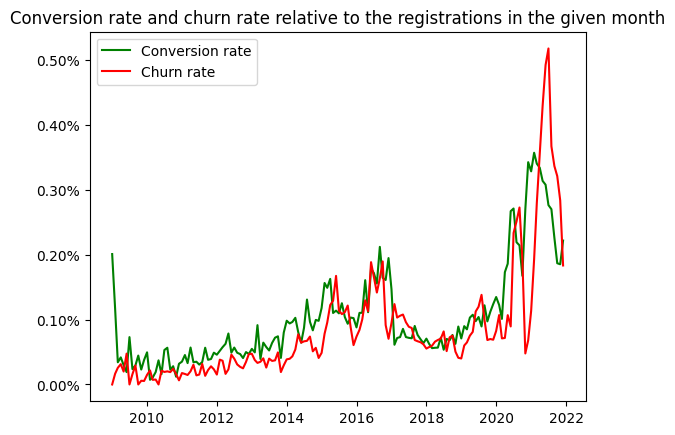

In [66]:
fig, ax1 = plt.subplots()
ax1.plot(data["date"],data["conv_rate_per_reg"],color = "green",label = "Conversion rate")
ax1.plot(data["date"],data["churn_rate_per_reg"], color = "red",label = "Churn rate")
#ax1.set_yscale('log')
#ax1.yaxis.set_major_formatter(FormatStrFormatter('%1.6f'))
ax1.set_title("Conversion rate and churn rate relative to the registrations in the given month")
ax1.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.2%}'.format(y)))
plt.legend()
# Displaying the plot
plt.show()

## Predikció

#### Jelezzétek előre a 2022.01.01-t követő 12 hónap növekedését havi szinten!
A churn, a gain, a total és a registrations is érdekel!
Milyen metrika szerint érdemes értékelni?

Lehet, hogy full faszság, de a regisztrációk és a lemorzsolódók arányával/számával hülyeségnek tűnik az előfizetések arányát prediktálni, ezért csak az időt és a változók lag-jeit fogom felhasználni. Itt az órai kódokat fogom használni kreativitás hiányában, valamilyen polinomiális függvény illesztésével. Lehetne idősoros modelleket is csinálni, ezeknek ebben az esetben valszeg több értelmük lenne, de azokhoz nem értek és ennek a mókolásnak úgysem lesz sok értelme.

In [70]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [110]:
# Az időt simán a hónapok sorszáma fogja jelenteni
data["month_counter"] = range(1, len(data) + 1)

In [111]:
data.columns

Index(['report_month', 'churn', 'gain', 'total', 'registrations', 'user_count',
       'reg_rate_per_user', 'churn_rate_per_reg', 'churn_rate_per_user',
       'conv_rate_per_reg', 'conv_rate_per_user', 'reg_delta', 'churn_delta',
       'gain_delta', 'date', 'year', 'month', 'net_gain',
       'churn_rate_per_user_1', 'month_counter'],
      dtype='object')

#### Dummy adat óráról

In [77]:
# true data generating process
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

# for reproducibility, the random numbers will be the same
np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

X_test = np.linspace(0, 1, 100)
y_test = true_fun(X_test)

In [78]:
X

array([0.0202184 , 0.07103606, 0.0871293 , 0.11827443, 0.14335329,
       0.38344152, 0.41466194, 0.4236548 , 0.43758721, 0.46147936,
       0.52184832, 0.52889492, 0.54488318, 0.5488135 , 0.56804456,
       0.60276338, 0.63992102, 0.64589411, 0.71518937, 0.77815675,
       0.78052918, 0.79172504, 0.79915856, 0.83261985, 0.87001215,
       0.891773  , 0.92559664, 0.94466892, 0.96366276, 0.97861834])

In [79]:
polynomial_features = PolynomialFeatures(degree=4, include_bias=False)
linear_regression = LinearRegression()
pipeline = Pipeline(
        [
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression),
        ]
    )
pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
scores = cross_val_score(
        pipeline, X[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10
)

In [80]:
scores

array([-0.25174939, -0.04193604, -0.02725282, -0.02934695, -0.00485939,
       -0.00487645, -0.01858739, -0.03843547, -0.01218562, -0.00285797])

In [81]:
y

array([ 1.0819082 ,  0.87027612,  1.14386208,  0.70322051,  0.78494746,
       -0.25265944, -0.22066063, -0.26595867, -0.4562644 , -0.53001927,
       -0.86481449, -0.99462675, -0.87458603, -0.83407054, -0.77090649,
       -0.83476183, -1.03080067, -1.02544303, -1.0788268 , -1.00713288,
       -1.03009698, -0.63623922, -0.86230652, -0.75328767, -0.70023795,
       -0.41043495, -0.50486767, -0.27907117, -0.25994628, -0.06189804])

#### Chess.com-os adat

In [141]:
data = data.assign(

    reg_lag_1= lambda x: x.registrations.shift(1),
    reg_lag_2= lambda x: x.registrations.shift(2),

    gain_lag_1= lambda x: x.gain.shift(1),
    gain_lag_2= lambda x: x.gain.shift(2),

    churn_lag_1= lambda x: x.churn.shift(1),
    churn_lag_2= lambda x: x.churn.shift(2),

    total_lag_1= lambda x: x.total.shift(1),
    total_lag_2= lambda x: x.total.shift(2)


)

In [152]:
feature_cols = [col for col in data.columns[19:28]]
feature_cols

['month_counter',
 'reg_lag_1',
 'reg_lag_2',
 'gain_lag_1',
 'gain_lag_2',
 'churn_lag_1',
 'churn_lag_2',
 'total_lag_1',
 'total_lag_2']

In [168]:
#This has missing values that the simple polynomialfeatures cannot handle --> drop them (this affects only the first 2 months as the missing values come from the lags)
X = data.loc[:,feature_cols]
X = X.dropna()

y = data.loc[2:,"conv_rate_per_reg"].to_numpy()

In [169]:
polynomial_features = PolynomialFeatures(degree=4, include_bias=False)
linear_regression = LinearRegression()
pipeline = Pipeline(
        [
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression),
        ]
    )


In [170]:
pipeline.fit(X,y)

Pipeline(steps=[('polynomial_features',
                 PolynomialFeatures(degree=4, include_bias=False)),
                ('linear_regression', LinearRegression())])

In [171]:
x_test = np.array(range(157,157+12))

In [172]:
y_pred = pipeline.predict(x_test[:,np.newaxis])

C:\Users\klapc6\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


ValueError: X has 1 features, but PolynomialFeatures is expecting 9 features as input.

In [138]:
y_pred

array([0.00359243, 0.0037487 , 0.00391156, 0.00408119, 0.00425777,
       0.00444146, 0.00463245, 0.0048309 , 0.005037  , 0.00525094,
       0.00547289, 0.00570304])